In [2]:
from sklearn.metrics import ConfusionMatrixDisplay
from util.helper import calculate_metrics

import pandas as pd

/Users/dgardner/GitHub/catalpa-cl/rwse-experiments/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 10k data set

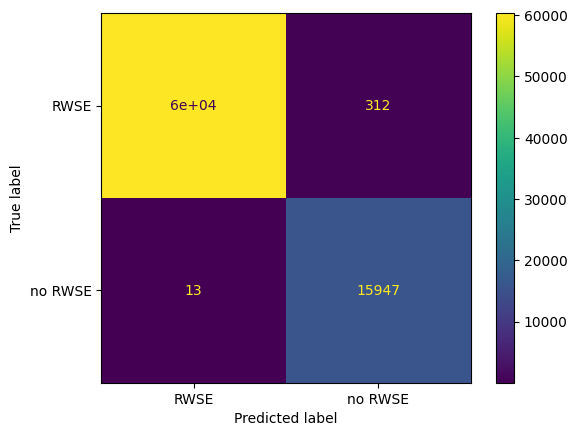

In [2]:
file_false_positives = 'output/report_false_positives.csv'
file_true_positives = 'output/report_true_positives.csv'

report_10k, confusion_matrix = calculate_metrics(file_false_positives, file_true_positives)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['RWSE', 'no RWSE'])
disp.plot()
# [confusion_matrix_dict['TP'], confusion_matrix_dict['FN']],
# [confusion_matrix_dict['FP'], confusion_matrix_dict['TN']]


In [3]:
df_10k = pd.DataFrame.from_dict(report_10k, orient='index', columns=['value'])
df_10k.to_csv('output/metrics_10k.csv', header=None)
df_10k

,value
precision,0.999785
mean false-positive rate,0.001297
mean sensitivity (mean recall),0.973319
sensitivity (recall),0.994854
specificity,0.999185
f1,0.997313


# Balanced data set

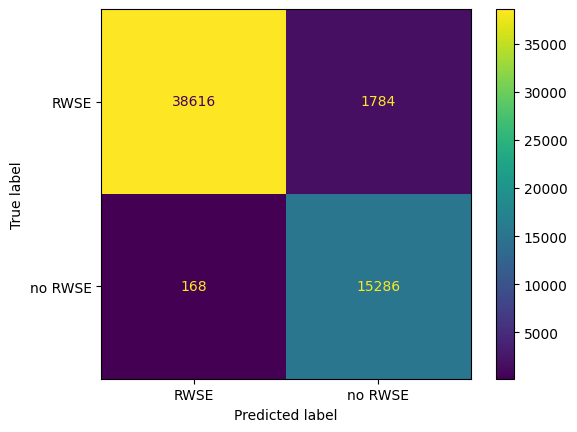

In [4]:
file_false_positives = 'output/report_false_positives_balanced.csv'
file_true_positives = 'output/report_true_positives_balanced.csv'

report_balanced, confusion_matrix = calculate_metrics(file_false_positives, file_true_positives)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['RWSE', 'no RWSE'])
disp.plot()
# [confusion_matrix_dict['TP'], confusion_matrix_dict['FN']],
# [confusion_matrix_dict['FP'], confusion_matrix_dict['TN']]

In [5]:
df_balanced = pd.DataFrame.from_dict(report_balanced, orient='index', columns=['value'])
df_balanced.to_csv('output/metrics_balanced.csv', header=None)
df_balanced

,value
precision,0.995668
mean false-positive rate,0.010578
mean sensitivity (mean recall),0.951251
sensitivity (recall),0.955842
specificity,0.989129
f1,0.975349


# Comparision

In [6]:
df_10k - df_balanced

,value
precision,0.004116
mean false-positive rate,-0.009281
mean sensitivity (mean recall),0.022068
sensitivity (recall),0.039013
specificity,0.010056
f1,0.021965


# Magnitude Search (Balanced)

In [43]:
report_data = pd.read_csv('output/report_magnitude_search_balanced.csv', sep=';')
report_data.set_index('magnitude', inplace=True)
report_data['precision'] = report_data['TP'] / (report_data['TP'] + report_data['FP'])
report_data['fallout'] = report_data['FP'] / (report_data['FP'] + report_data['TN']) #false-positive-rate
report_data['sensitivity'] = report_data['TP'] / (report_data['FN'] + report_data['TP']) #true-positive-rate
report_data['specificity'] = report_data['TN'] / (report_data['FP'] + report_data['TN'])
report_data['f1'] = 2 * report_data['precision'] * report_data['sensitivity'] / (report_data['precision'] + report_data['sensitivity'])
report_data

,TP,TN,FP,FN,total,precision,fallout,sensitivity,specificity,f1
magnitude,,,,,,,,,,
1,39242,15024,430,1158,55854,0.989161,0.027825,0.971337,0.972175,0.980168
2,39124,15139,315,1276,55854,0.992013,0.020383,0.968416,0.979617,0.980072
3,39036,15191,263,1364,55854,0.993308,0.017018,0.966238,0.982982,0.979586
4,38954,15221,233,1446,55854,0.994054,0.015077,0.964208,0.984923,0.978904
5,38887,15240,214,1513,55854,0.994527,0.013848,0.962550,0.986152,0.978277
6,38823,15252,202,1577,55854,0.994824,0.013071,0.960965,0.986929,0.977602
7,38761,15264,190,1639,55854,0.995122,0.012295,0.959431,0.987705,0.976951
8,38708,15275,179,1692,55854,0.995397,0.011583,0.958119,0.988417,0.976402
9,38668,15283,171,1732,55854,0.995597,0.011065,0.957129,0.988935,0.975984


array([<Axes: xlabel='magnitude'>, <Axes: xlabel='magnitude'>,
       <Axes: xlabel='magnitude'>, <Axes: xlabel='magnitude'>,
       <Axes: xlabel='magnitude'>], dtype=object)

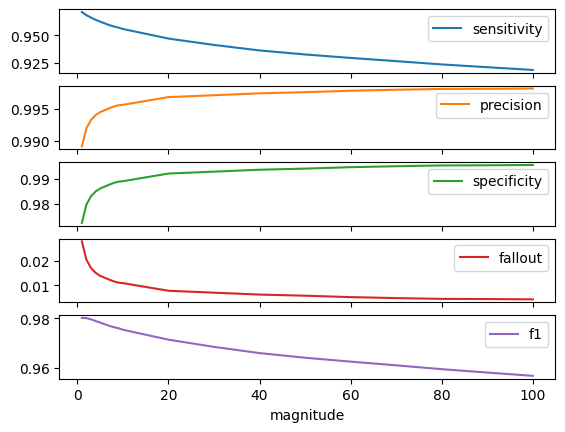

In [41]:
report_data[['sensitivity', 'precision', 'specificity', 'fallout', 'f1']].plot(subplots=True)

array([<Axes: xlabel='magnitude'>, <Axes: xlabel='magnitude'>,
       <Axes: xlabel='magnitude'>, <Axes: xlabel='magnitude'>,
       <Axes: xlabel='magnitude'>], dtype=object)

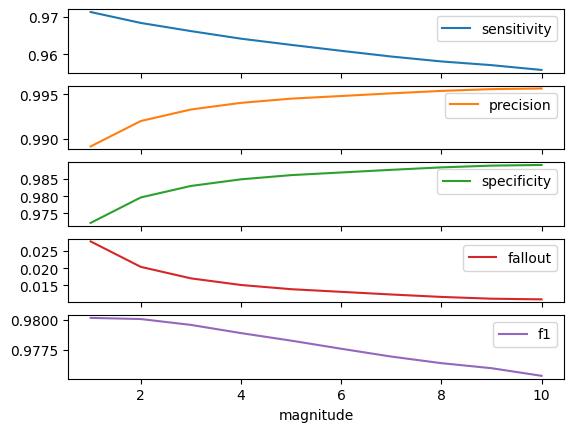

In [42]:
filtered_report_data = report_data[report_data.index < 11]
filtered_report_data[['sensitivity', 'precision', 'specificity', 'fallout', 'f1']].plot(subplots=True)